In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

data = pd.read_csv("train.csv")
data.head(10)

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80
5,Berlin,January,2024,50,Low,55,35,7.5,80,85
6,Tokyo,January,2024,65,High,30,70,6.0,120,90
7,Seoul,January,2024,70,High,25,75,5.8,105,75
8,Mumbai,January,2024,80,Very High,15,80,4.5,70,60
9,Sydney,January,2024,55,Low,60,30,7.8,115,88


In [157]:
data.isnull().sum()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  545 non-null    object 
 1   Month                 545 non-null    object 
 2   Year                  545 non-null    int64  
 3   Decibel_Level         545 non-null    int64  
 4   Traffic_Density       545 non-null    object 
 5   Green_Space_Area      545 non-null    int64  
 6   Air_Quality_Index     545 non-null    int64  
 7   Happiness_Score       545 non-null    float64
 8   Cost_of_Living_Index  545 non-null    int64  
 9   Healthcare_Index      545 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 42.7+ KB


In [158]:
data.shape

(545, 10)

In [159]:
data.describe()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2026.082569,56.779817,1085.366972,38.036697,-44.865505,30.458716,93.086239
std,1.652363,6.856402,756.993165,36.300656,42.407240,21.082180,10.550034
min,2024.000000,50.000000,5.000000,5.000000,-122.900000,20.000000,35.000000
25%,2025.000000,55.000000,385.000000,25.000000,-82.100000,20.000000,95.000000
50%,2026.000000,55.000000,1065.000000,30.000000,-41.300000,25.000000,96.000000
75%,2027.000000,60.000000,1745.000000,35.000000,-0.500000,25.000000,97.000000
max,2029.000000,90.000000,2425.000000,245.000000,8.600000,130.000000,99.000000


In [160]:
data.nunique() 

City                    227
Month                    12
Year                      6
Decibel_Level             9
Traffic_Density           4
Green_Space_Area        485
Air_Quality_Index        49
Happiness_Score         458
Cost_of_Living_Index     23
Healthcare_Index         24
dtype: int64

In [161]:
data.drop_duplicates(subset=['City'], keep='first', inplace=True, ignore_index=False)


In [163]:
loudest = data[['Decibel_Level', 'City']].sort_values(by="Decibel_Level",ascending=False)
loudest = loudest.head(10)
loudest = loudest.sort_values(by="Decibel_Level",ascending=True)
loudest

,Decibel_Level,City
15,80,Bangkok
56,80,Beijing
66,80,Phnom Penh
64,80,Yangon
57,85,New Delhi
68,85,Bangalore
65,85,Hanoi
59,85,Karachi
69,90,Ho Chi Minh City
60,90,Dhaka


In [164]:
fig = go.Figure([go.Bar(x=loudest['City'], y=loudest['Decibel_Level'])])
fig.update_layout(title="Top 10 Cities with the highest decibel levels", xaxis_title="Cities",
    yaxis_title="Decibel Levels")
fig.show()

In [165]:
most_green = data[['Green_Space_Area', 'City']].sort_values(by="Green_Space_Area",ascending=False)
most_green = most_green.head(10)
most_green = most_green.sort_values(by="Green_Space_Area",ascending=True)
most_green

,Green_Space_Area,City
258,995,Ashburton
260,1005,Kaiapoi
261,1010,Rangiora
262,1015,Amberley
264,1025,Waiau
290,1155,Golden Bay
313,1270,Southland
314,1275,The Catlins
315,1280,Otago Peninsula
320,1305,Canterbury


In [166]:
fig = go.Figure([go.Bar(x=most_green['City'], y=most_green['Green_Space_Area'])])
fig.update_layout(title="Top 10 Cities with the most green space area", xaxis_title="Cities",
    yaxis_title="Green Space Area")
fig.show()

In [167]:
best_air = data[['Air_Quality_Index', 'City']].sort_values(by="Air_Quality_Index",ascending=False)
best_air = best_air.head(10)
best_air = best_air.sort_values(by="Air_Quality_Index",ascending=True)
best_air

,Air_Quality_Index,City
60,195,Dhaka
61,200,Colombo
62,205,Islamabad
63,210,Kathmandu
64,215,Yangon
65,220,Hanoi
66,225,Phnom Penh
67,230,Vientiane
68,235,Bangalore
69,240,Ho Chi Minh City


In [168]:
fig = go.Figure([go.Bar(x=best_air['City'], y=best_air['Air_Quality_Index'])])
fig.update_layout(title="Top 10 Cities with the best air quality index", xaxis_title="Cities",
    yaxis_title="Air Quality Index")
fig.show()

In [169]:
happiest = data[['Happiness_Score', 'City']].sort_values(by="Happiness_Score",ascending=False)
happiest = happiest.head(10)
happiest = happiest.sort_values(by="Happiness_Score",ascending=True)
happiest

,Happiness_Score,City
82,8.3,Tauranga
92,8.3,Tokoroa
78,8.4,Queenstown
83,8.4,Rotorua
88,8.4,Gisborne
34,8.4,Helsinki
79,8.5,Nelson
84,8.5,Palmerston North
33,8.5,Oslo
80,8.6,Napier


In [170]:
fig = go.Figure([go.Bar(x=happiest['City'], y=happiest['Happiness_Score'])])
fig.update_layout(title="Top 10 Cities with the highest happiness score", xaxis_title="Cities",
    yaxis_title="Happiness Score")
fig.show()

In [171]:
most_expensive = data[['Cost_of_Living_Index', 'City']].sort_values(by="Cost_of_Living_Index",ascending=False)
most_expensive = most_expensive.head(10)
most_expensive = most_expensive.sort_values(by="Cost_of_Living_Index",ascending=True)
most_expensive

,Cost_of_Living_Index,City
3,110,London
31,110,Copenhagen
21,110,Dubai
71,110,Perth
25,115,Melbourne
33,115,Oslo
9,115,Sydney
6,120,Tokyo
20,125,Singapore
22,130,Hong Kong


In [172]:
fig = go.Figure([go.Bar(x=most_expensive['City'], y=most_expensive['Cost_of_Living_Index'])])
fig.update_layout(title="Top 10 Cities with the highest cost of living index", xaxis_title="Cities",
    yaxis_title="Cost of Living Index")
fig.show()

In [173]:
best_healthcare = data[['Healthcare_Index', 'City']].sort_values(by="Healthcare_Index",ascending=False)
best_healthcare = best_healthcare.head(10)
best_healthcare = best_healthcare.sort_values(by="Healthcare_Index",ascending=True)
best_healthcare

,Healthcare_Index,City
320,98,Canterbury
132,98,Tutukaka
180,98,Blenheim
176,98,Hastings
164,98,Langs Beach
160,98,Marsden Point
156,98,Taurikura
152,98,Hikurangi
148,98,Moerewa
33,99,Oslo


In [174]:
fig = go.Figure([go.Bar(x=best_healthcare['City'], y=best_healthcare['Healthcare_Index'])])
fig.update_layout(title="Top 10 Cities with the highest healthcare index", xaxis_title="Cities",
    yaxis_title="Healthcare Index")
fig.show()

In [175]:
happiness_to_cost = data[['Happiness_Score', 'City','Cost_of_Living_Index']].sort_values(by="Happiness_Score",ascending=False)
happiness_to_cost = happiness_to_cost.head(10)
happiness_to_cost.head(10)

,Happiness_Score,City,Cost_of_Living_Index
80,8.6,Napier,65
79,8.5,Nelson,70
84,8.5,Palmerston North,45
33,8.5,Oslo,115
78,8.4,Queenstown,75
83,8.4,Rotorua,50
88,8.4,Gisborne,25
34,8.4,Helsinki,90
82,8.3,Tauranga,55
92,8.3,Tokoroa,25


In [176]:
fig = go.Figure([go.Bar(x=happiness_to_cost['City'], y=happiness_to_cost['Cost_of_Living_Index'])])
fig.update_layout(title="Cost of living index comparison in the cities with the highest happiness score", xaxis_title="City",
    yaxis_title="Cost of living index")
fig.show()

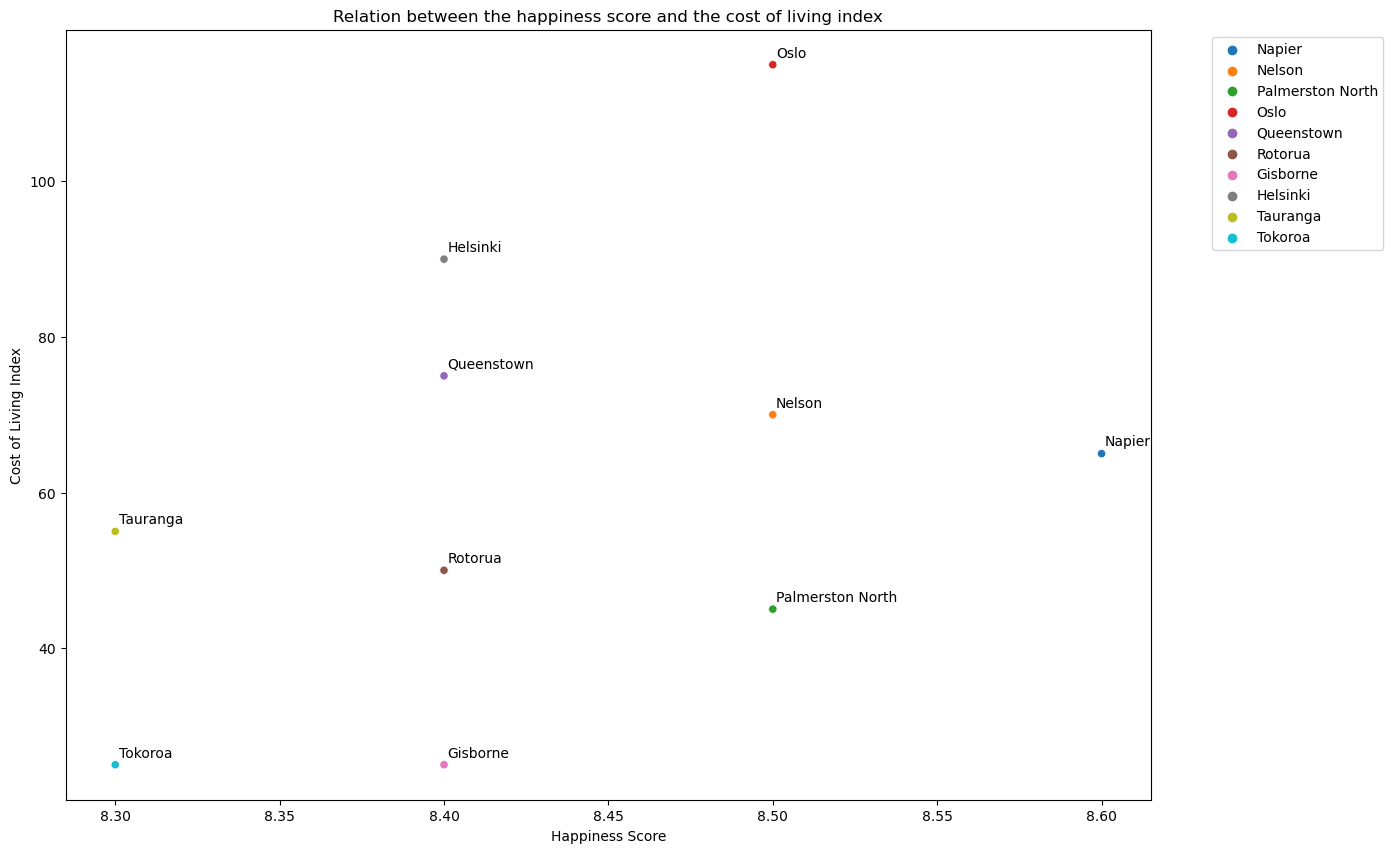

In [177]:
plt.figure(figsize=(14, 10))

sns.scatterplot(data=happiness_to_cost, x='Happiness_Score', y='Cost_of_Living_Index', hue='City')

plt.xlabel('Happiness Score')
plt.ylabel('Cost of Living Index')
plt.title('Relation between the happiness score and the cost of living index')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for index, row in happiness_to_cost.iterrows():
    plt.text(row['Happiness_Score'] +0.001, row['Cost_of_Living_Index']+1, row['City'])
plt.show()

In [178]:
happiness_to_air = data[['Happiness_Score', 'City','Air_Quality_Index']].sort_values(by="Happiness_Score",ascending=False)
happiness_to_air = happiness_to_air.head(10)
happiness_to_air.head(10)

,Happiness_Score,City,Air_Quality_Index
80,8.6,Napier,5
79,8.5,Nelson,10
84,8.5,Palmerston North,20
33,8.5,Oslo,25
78,8.4,Queenstown,15
83,8.4,Rotorua,25
88,8.4,Gisborne,20
34,8.4,Helsinki,20
82,8.3,Tauranga,30
92,8.3,Tokoroa,20


In [179]:
fig = go.Figure([go.Bar(x=happiness_to_air['City'], y=happiness_to_air['Air_Quality_Index'])])
fig.update_layout(title="Air quality index comparison in the cities with the highest happiness score", xaxis_title="City",
    yaxis_title="Air quality index")
fig.show()

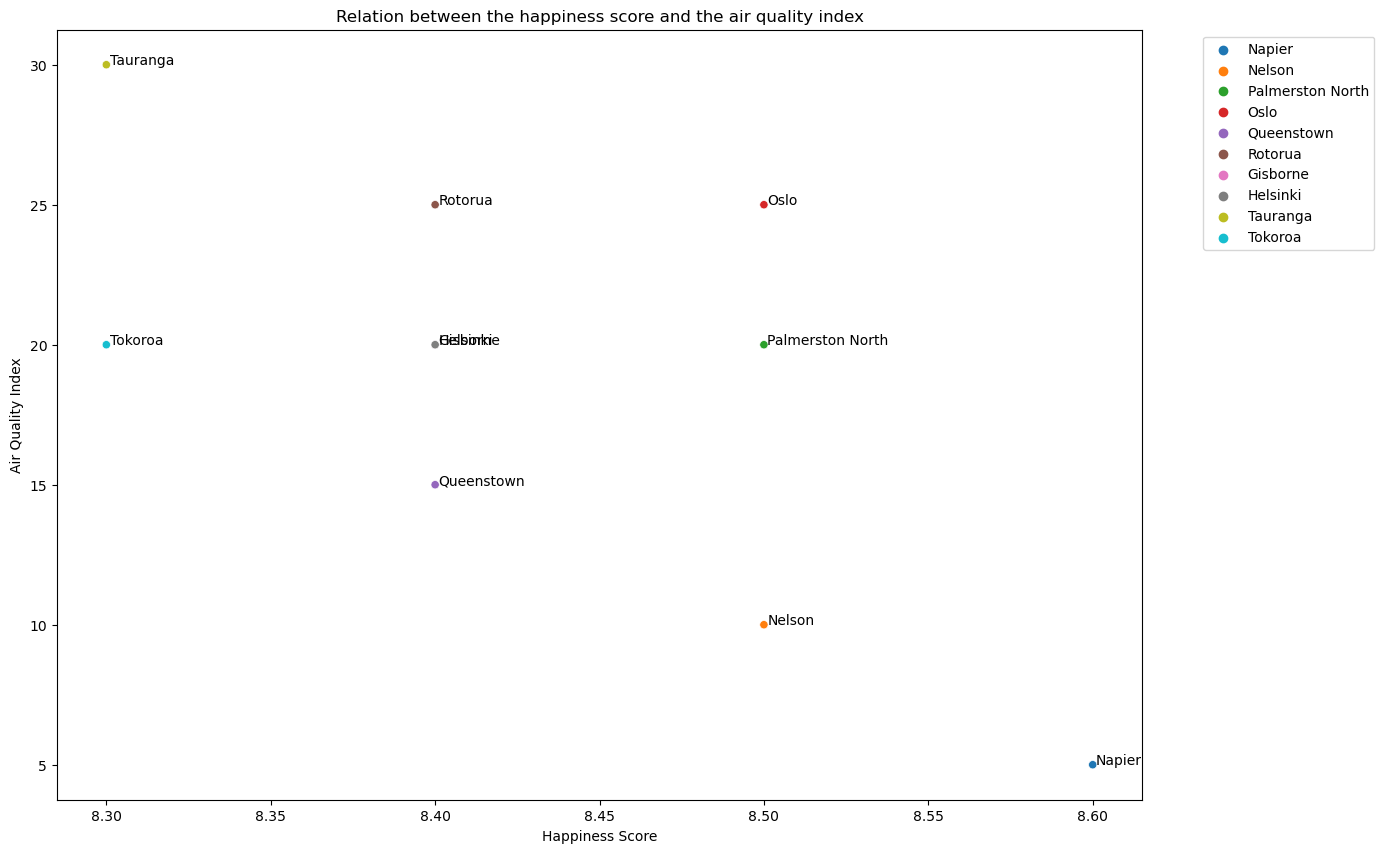

In [180]:
plt.figure(figsize=(14, 10))

sns.scatterplot(data=happiness_to_air, x='Happiness_Score', y='Air_Quality_Index', hue='City')

plt.xlabel('Happiness Score')
plt.ylabel('Air Quality Index')
plt.title('Relation between the happiness score and the air quality index')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for index, row in happiness_to_air.iterrows():
    plt.text(row['Happiness_Score'] +0.001, row['Air_Quality_Index'], row['City'])
plt.show()

In [181]:
happiness_to_health = data[['Happiness_Score', 'City','Healthcare_Index']].sort_values(by="Happiness_Score",ascending=False)
happiness_to_health = happiness_to_health.head(10)
happiness_to_health.head(10)

,Happiness_Score,City,Healthcare_Index
80,8.6,Napier,98
79,8.5,Nelson,97
84,8.5,Palmerston North,98
33,8.5,Oslo,99
78,8.4,Queenstown,96
83,8.4,Rotorua,97
88,8.4,Gisborne,98
34,8.4,Helsinki,95
82,8.3,Tauranga,96
92,8.3,Tokoroa,98


In [182]:
fig = go.Figure([go.Bar(x=happiness_to_health['City'], y=happiness_to_health['Healthcare_Index'])])
fig.update_layout(title="Healthcare index comparison in the cities with the highest happiness score", xaxis_title="City",
    yaxis_title="Healthcare index")
fig.show()

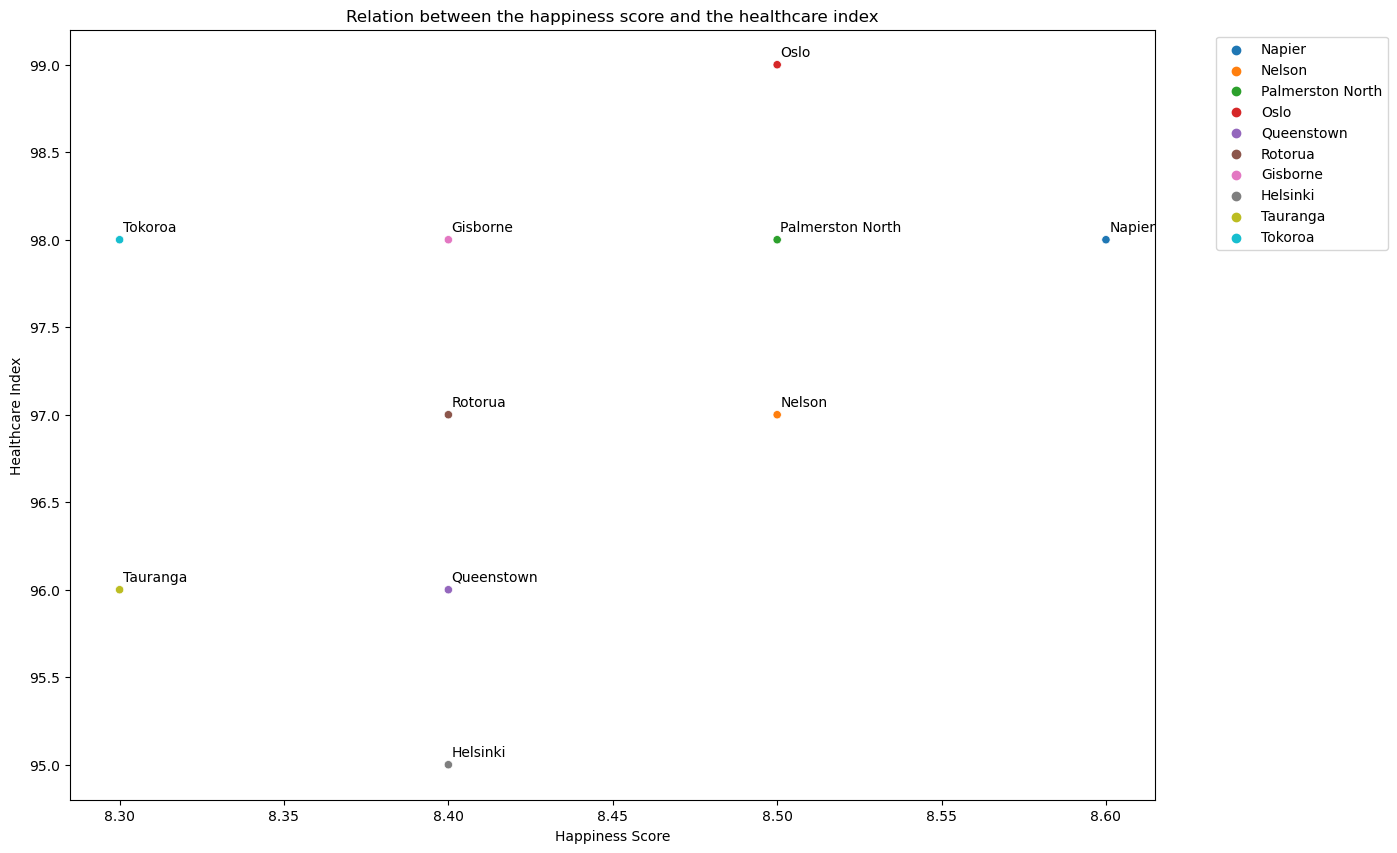

In [183]:
plt.figure(figsize=(14, 10))

sns.scatterplot(data=happiness_to_health, x='Happiness_Score', y='Healthcare_Index', hue='City')

plt.xlabel('Happiness Score')
plt.ylabel('Healthcare Index')
plt.title('Relation between the happiness score and the healthcare index')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for index, row in happiness_to_health.iterrows():
    plt.text(row['Happiness_Score'] +0.001, row['Healthcare_Index']+0.05, row['City'])
plt.show()

In [184]:
happiness_to_green = data[['Happiness_Score', 'City','Green_Space_Area']].sort_values(by="Happiness_Score",ascending=False)
happiness_to_green = happiness_to_green.head(10)
happiness_to_green.head(10)

,Happiness_Score,City,Green_Space_Area
80,8.6,Napier,105
79,8.5,Nelson,100
84,8.5,Palmerston North,125
33,8.5,Oslo,85
78,8.4,Queenstown,95
83,8.4,Rotorua,120
88,8.4,Gisborne,145
34,8.4,Helsinki,90
82,8.3,Tauranga,115
92,8.3,Tokoroa,165


In [185]:
fig = go.Figure([go.Bar(x=happiness_to_green['City'], y=happiness_to_green['Green_Space_Area'])])
fig.update_layout(title="Green space area comparison in the cities with the highest happiness score", xaxis_title="City",
    yaxis_title="Green Space Area")
fig.show()

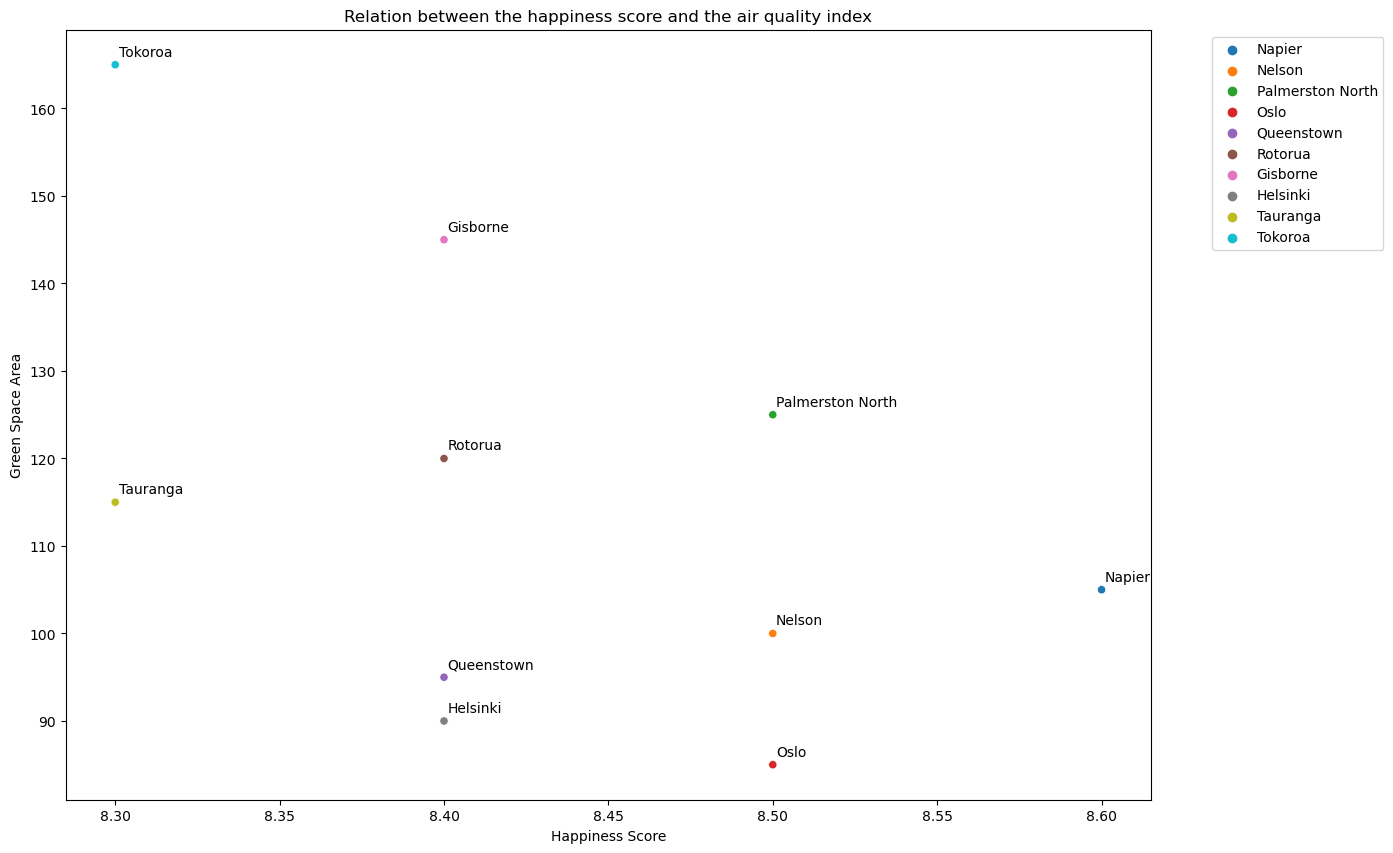

In [186]:
plt.figure(figsize=(14, 10))

sns.scatterplot(data=happiness_to_green, x='Happiness_Score', y='Green_Space_Area', hue='City')

plt.xlabel('Happiness Score')
plt.ylabel('Green Space Area')
plt.title('Relation between the happiness score and the air quality index')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for index, row in happiness_to_green.iterrows():
    plt.text(row['Happiness_Score'] +0.001, row['Green_Space_Area']+1, row['City'])
plt.show()

In [187]:
happiness_to_decibel = data[['Happiness_Score', 'City','Decibel_Level']].sort_values(by="Happiness_Score",ascending=False)
happiness_to_decibel = happiness_to_decibel.head(10)
happiness_to_decibel.head(10)

,Happiness_Score,City,Decibel_Level
80,8.6,Napier,55
79,8.5,Nelson,50
84,8.5,Palmerston North,55
33,8.5,Oslo,50
78,8.4,Queenstown,55
83,8.4,Rotorua,50
88,8.4,Gisborne,55
34,8.4,Helsinki,55
82,8.3,Tauranga,55
92,8.3,Tokoroa,55


In [188]:
fig = go.Figure([go.Bar(x=happiness_to_decibel['City'], y=happiness_to_decibel['Decibel_Level'])])
fig.update_layout(title="Decibel level comparison in the cities with the highest happiness score", xaxis_title="City",
    yaxis_title="Decibel Level")
fig.show()